In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
import pandas as pd
import gaussianfunctions as gauss

### Comparing variance constraint

In [2]:
def EMGMM(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.GaussianEM(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

def EMGMM2(X,initial_param):
    n_components=gauss.BIC_gmm(X)
    em=gauss.EMGMM_varconstraint(X,n_components,initial_param)
    t=gauss.findThreshold2(X,n_components,em)
    return(em,t)

### 3 components

In [3]:
X1=np.random.normal(5,np.sqrt(0.01),100)
X2=np.random.normal(2.5,np.sqrt(0.2),50)
X3=np.random.normal(0,np.sqrt(2),25)
X=np.array(list(X1)+list(X2)+list(X3))

### 4 components

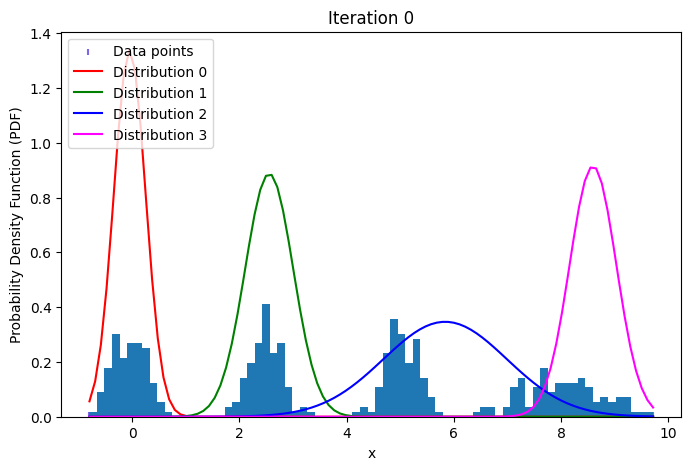

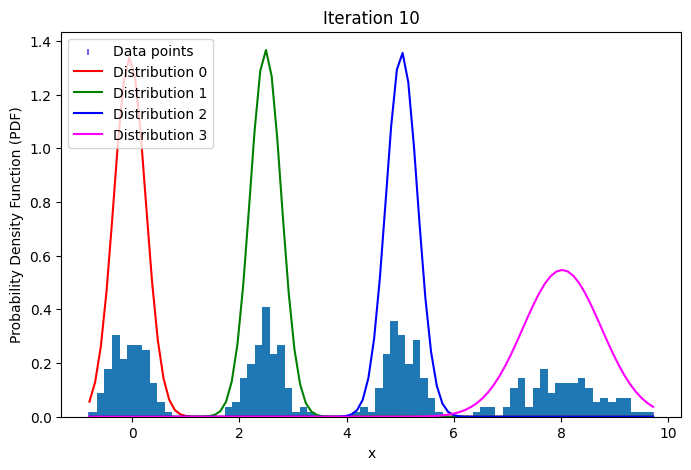

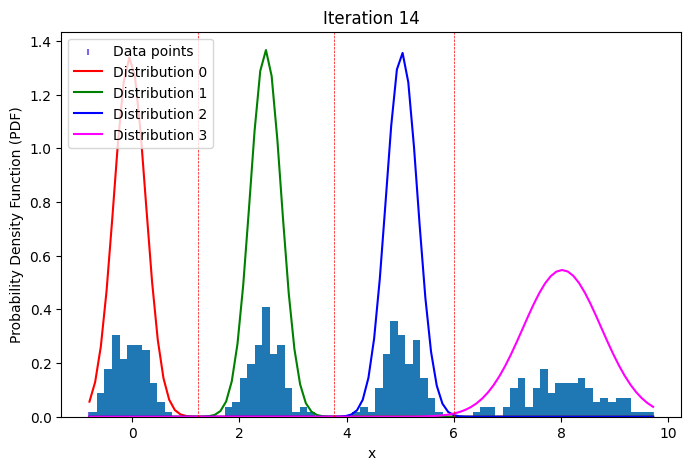

In [4]:
D1=np.random.normal(5,np.sqrt(0.1),100)
D2=np.random.normal(2.5,np.sqrt(0.1),100)
D3=np.random.normal(0,np.sqrt(0.1),100)
D4=np.random.normal(8, np.sqrt(0.5),100)
D=np.array(list(D1)+list(D2)+list(D3)+list(D4))

em=gauss.GaussianEM(D,4,[])
t=gauss.findThreshold1(D,4,em)
gauss.PlotGMM(D,em,10,t,[])

### Loading KIR data

In [3]:
B=pd.read_csv('/Users/devitahalim/SCIE30001_Project/GMM/locusRatioFrame.csv')

In [4]:
# KIR with 4 number of components
KIR2DS3_data=B["KIR2DS3"].to_numpy()

KIR2DS3_data.sort()

### Use sklearn.mixture.GaussianMixture

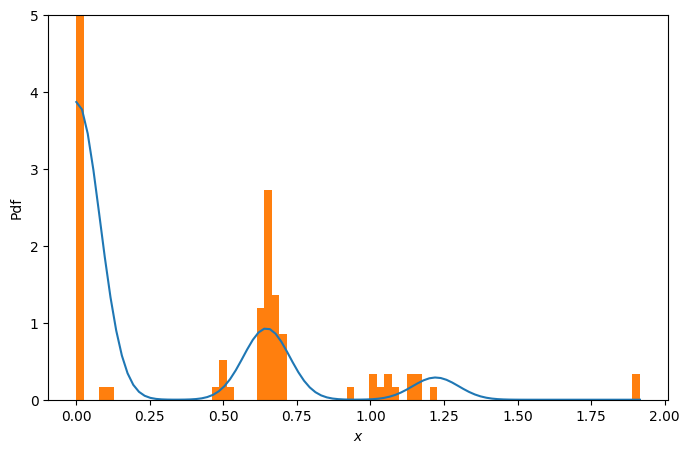

Means : [[0.64650836]
 [0.00148878]
 [1.22162941]]


In [293]:
X=KIR2DS3_data
X=X.reshape(-1,1)
gm=GaussianMixture().fit(X)
N=np.arange(1, 4)
models=[None for i in range(len(N))]

for i in range(len(N)):
    models[i]=GaussianMixture(N[i],covariance_type="tied").fit(X)

# compute the AIC and the BIC
AIC=[m.aic(X) for m in models]
BIC=[m.bic(X) for m in models]

plt.figure(figsize=(8,5))
M_best_BIC=models[np.argmin(BIC)]
# M_best_AIC=models[np.argmin(AIC)]

b=np.linspace(np.min(X),np.max(X),100)

log_prob1=M_best_BIC.score_samples(b.reshape(-1,1))
# log_prob2=M_best_AIC.score_samples(b.reshape(-1,1))

resp1=M_best_BIC.predict_proba(b.reshape(-1,1))
# resp2=M_best_AIC.predict_proba(b.reshape(-1,1))

pdf1=np.exp(log_prob1)
# pdf2=np.exp(log_prob2)


# plt.plot(b,pdf1)
plt.plot(b,pdf1)
plt.ylim(0,5)
plt.hist(X,bins=75, density=True)

plt.xlabel("$x$")
plt.ylabel("Pdf")

plt.show()

means=M_best_BIC.means_
print("Means :", means)

In [163]:
means_list=means.tolist()
means_list.sort()
print(means_list)

means_diff=list()
for i in range (len(means_list)-1):
    diff= np.subtract(means_list[i+1],means_list[i])
    means_diff.append(diff)
print(means_diff)

index=(BIC.index(np.amin(BIC)))+1
def all_meansdiff(means_diff):
    for i in means_diff:
        if i <0.4:
            return False
    return True

if all_meansdiff(means_diff)==False:
    index=index-1

print(index)

[[0.001488774879187743], [0.5005924093422123], [0.6596762547951908], [1.0826555476931474], [1.9153540923947778]]
[array([0.49910363]), array([0.15908385]), array([0.42297929]), array([0.83269854])]
4


In [156]:
def BIC_gmm(X):
    X=X.reshape(-1,1)

    # Possible number of components
    n=np.arange(1, 7)

    # Do EM for all possible number of components
    gmm_models=[None for k in range(len(n))]
    for k in range(len(n)):
        gmm_models[k]=GaussianMixture(n[k],covariance_type="tied").fit(X)

    # Compute BIC for each number of components
    BIC=[models.bic(X) for models in gmm_models]

    # Choose the one with lowest BIC
    model_bestBIC = gmm_models[np.argmin(BIC)]

    # Compute the means and change it to sorted list
    means=model_bestBIC.means_
    means_list=means.tolist()
    means_list.sort()
    print('Means :',means_list)
    
    # Calculate the distance between the means
    means_diff=list()
    for i in range (len(means_list)-1):
        diff= np.subtract(means_list[i+1],means_list[i])
        means_diff.append(diff)
    print("Distance between means :",means_diff)
    
    # Number of components
    index=(BIC.index(np.amin(BIC)))+1
    print("Original number of components :",index)

    def all_meansdiff(means_diff):
        for i in means_diff:
            if i <0.4:
                return False
        return True

    # Reduce number of components if the distance is less than 0.4
    if all_meansdiff(means_diff)==False:
        index=index-1

    return (index)

In [155]:
BIC_gmm(KIR2DS3_data)

Means : [[0.001488774879187743], [0.5005924093422123], [0.6596762547951908], [1.0826555476931474], [1.9153540923947778]]
Distance between means : [array([0.49910363]), array([0.15908385]), array([0.42297929]), array([0.83269854])]
Original number of components : 5


4

### Change the one on my em

In [164]:
def EMGMM_var_comp(X,n_components:int, initial_param):
    
    while n_components<6:
        if initial_param==[]:
            def get_spaced_elm(X, n_components):
                spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
                return spaced_elm
            
            def get_elm(X,n_components):
                b=np.linspace(min(X),max(X),n_components)
                return b

            initial_means=get_elm(X,n_components)
            
            initial_param=list()
            for i in range(n_components):
                init_params={
                'Mean':initial_means[i],
                'Variance': 0.005,
                'Weight': 1/n_components
            }
                initial_param.append(init_params)

        epsilon=-1e-200 #to avoid singularities
        
        # Stopping criteria
        mean_delta=1e-6
        var_delta=1e-4
        weight_delta=1e-8

        max_iteration=50
        iteration=0

        iteration_param=list()

        while iteration<max_iteration:
            
            px_j=[]
            for j in range(n_components):
                px_j.append(gauss.GaussianPDF(X, initial_param[j]['Mean'], initial_param[j]['Variance']))
            px_j = np.array(px_j)
            
            posterior = []
            new_parameters=list()
            for j in range(n_components):
                # Calculate the probabilities of each data to belong from either gaussian  
                posterior.append((px_j[j] * initial_param[j]['Weight']) / (np.sum([px_j[i] * initial_param[i]['Weight'] for i in range(n_components)], axis=0)+epsilon))
            
            # Maximisation step (M-step):
                # Update the parameters
                mu=np.sum(posterior[j] * X) / (np.sum(posterior[j]+epsilon))
                
                # Constraint the variance
                newvar_temp=np.sum(posterior[j] * np.square(X - mu)) / (np.sum(posterior[j]+epsilon))
                if newvar_temp<0.01:
                    newvar=newvar_temp
                else:
                    newvar=initial_param[j]['Variance']

                # New parameters
                new_param={
                    'Mean':mu,
                    'Variance':newvar,
                    'Weight':np.mean(posterior[j])
                }
                new_parameters.append(new_param)

            # Calculate difference between parameters
            mean_diff=list()
            for i in range (n_components):
                mean_diff_indiv=(abs(new_parameters[i]['Mean']-initial_param[i]['Mean'])/(abs(initial_param[i]['Mean']+epsilon)))
                mean_diff.append(mean_diff_indiv)

            var_diff=list()
            for i in range(n_components):
                var_diff_indiv=(abs(new_parameters[i]['Variance']-initial_param[i]['Variance'])/abs(initial_param[i]['Variance']))
                var_diff.append(var_diff_indiv)

            weight_diff=list()
            for i in range(n_components):
                weight_diff_indv=(abs(new_parameters[i]['Weight']-initial_param[i]['Weight'])/abs(initial_param[i]['Weight']))
                weight_diff.append(weight_diff_indv)
            
            # Check if difference between iterations is less than the stopping criterion
            def check_less_than(list, value): 
                for x in list: 
                    if value <= x: 
                        return False
                return True

            # Stop iterations if already satisfy the stopping condition
            if check_less_than(mean_diff,mean_delta) is True\
                and check_less_than(var_diff,var_delta) is True\
                and check_less_than(weight_diff, weight_delta) is True:
                break

            iteration+=1
            initial_param=new_parameters

            iteration_param.append(new_parameters)
        
        means_diff=list()
        for i in range (len(means_list)-1):
            diff= np.subtract(means_list[i+1],means_list[i])
            means_diff.append(diff)

        def all_meansdiff(means_diff):
            for i in means_diff:
                if i <0.4:
                    return False
            return True

    return(iteration_param)

In [5]:
def EMGMM_var(X,n_components:int, initial_param):
    
    if initial_param==[]:
        def get_spaced_elm(X, n_components):
            spaced_elm = X[np.round(np.linspace(0, len(X)-1, n_components)).astype(int)]
            return spaced_elm
        
        def get_elm(X,n_components):
            b=np.linspace(min(X),max(X),n_components)
            return b

        initial_means=get_elm(X,n_components)
        
        initial_param=list()
        for i in range(n_components):
            init_params={
            'Mean':initial_means[i],
            'Variance': 0.005,
            'Weight': 1/n_components
        }
            initial_param.append(init_params)

    epsilon=-1e-200 #to avoid singularities
    #stopping condition
    mean_delta=1e-6
    var_delta=1e-4
    weight_delta=1e-8

    max_iteration=20
    iteration=0

    iteration_param=list()

    while iteration<max_iteration:
        
        px_j=[]
        for j in range(n_components):
            px_j.append(gauss.GaussianPDF(X, initial_param[j]['Mean'], initial_param[j]['Variance']))
        px_j = np.array(px_j)
        
        posterior = []
        new_parameters=list()
        for j in range(n_components):
            #Calculate the probabilities of each data to belong from either gaussian  
            posterior.append((px_j[j] * initial_param[j]['Weight']) / (np.sum([px_j[i] * initial_param[i]['Weight'] for i in range(n_components)], axis=0)+epsilon))
            
        #Maximisation step (M-step):
            #Update the parameters
            mu=np.sum(posterior[j] * X) / (np.sum(posterior[j]+epsilon))
            
            # Constraint the variance
            newvar_temp=np.sum(posterior[j] * np.square(X - mu)) / (np.sum(posterior[j]+epsilon))
            if newvar_temp<0.015:
                newvar=newvar_temp
            else:
                newvar=initial_param[j]['Variance']

            # New parameters
            new_param={
                'Mean':mu,
                'Variance':newvar,
                'Weight':np.mean(posterior[j])
            }
            new_parameters.append(new_param)
       
        #Calculate difference between parameters
        mean_diff=list()
        for i in range (n_components):
            mean_diff_indiv=(abs(new_parameters[i]['Mean']-initial_param[i]['Mean'])/(abs(initial_param[i]['Mean']+epsilon)))
            mean_diff.append(mean_diff_indiv)

        var_diff=list()
        for i in range(n_components):
            var_diff_indiv=(abs(new_parameters[i]['Variance']-initial_param[i]['Variance'])/abs(initial_param[i]['Variance']))
            var_diff.append(var_diff_indiv)

        weight_diff=list()
        for i in range(n_components):
            weight_diff_indv=(abs(new_parameters[i]['Weight']-initial_param[i]['Weight'])/abs(initial_param[i]['Weight']))
            weight_diff.append(weight_diff_indv)
        
        #Check if difference between iterations is less than the stopping criterion
        def check_less_than(list, value): 
            for x in list: 
                if value <= x: 
                    return False
            return True

        # Stop iterations if already satisfy the stopping condition
        if check_less_than(mean_diff,mean_delta) is True\
            and check_less_than(var_diff,var_delta) is True\
            and check_less_than(weight_diff, weight_delta) is True:
            break

        iteration+=1
        initial_param=new_parameters

        iteration_param.append(new_parameters)
    return(iteration_param,px_j)

In [320]:
em,pxj_2DS3=EMGMM_var(KIR2DS3_data,gauss.BIC_gmm(KIR2DS3_data),[])

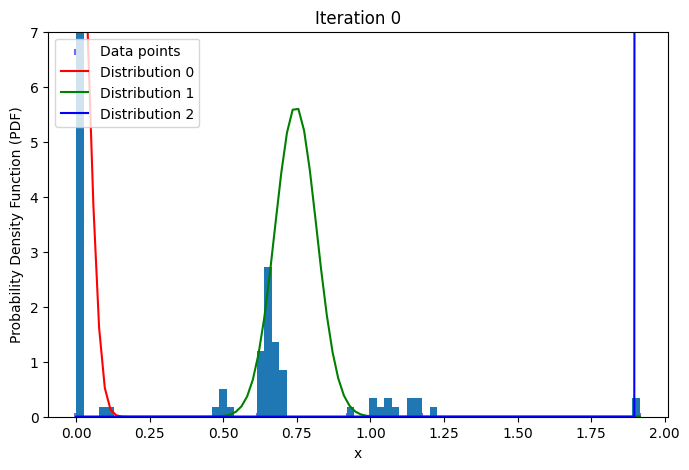

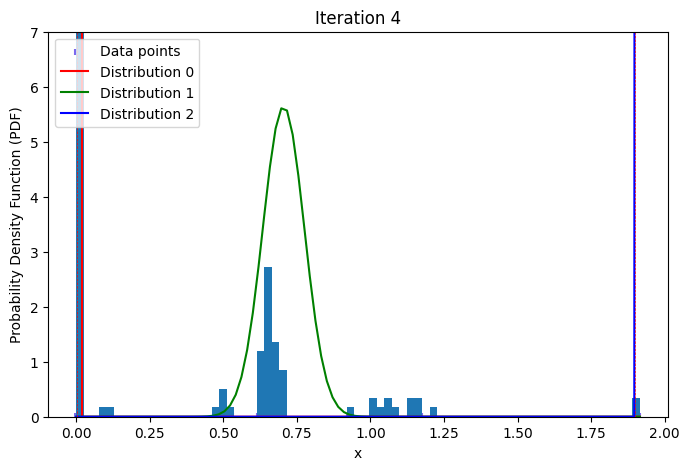

In [321]:
# Plot
gauss.PlotGMM(KIR2DS3_data,em,10,t,7)

In [10]:

KIR2DL3_data=B["KIR2DL3"].to_numpy()
KIR2DL3_data.sort()

In [324]:
em_KIR2DL3,pxj_2DL3=EMGMM_var(KIR2DL3_data,gauss.BIC_gmm(KIR2DL3_data),[])

In [6]:
def check_prob(pxj):
    
    prob_indv= [None for i in range(len(pxj[0]))]

    for i in range(len(pxj[0])):
        prob_indv[i]=[pxj[j][i] for j in range (len(pxj))]

    #Calculate the probability
    
    low_prob_on=list()
    for i in range (len(pxj[0])):
        if any(j>0.01 for j in prob_indv[i])==False:
            low_prob_on.append(i)
    return (len(low_prob_on))

In [7]:
def EM(X):
    n_components=gauss.BIC_gmm(X)
    X.sort()
    low_prob= len(X)
    while low_prob>=(0.05*len(X)):
        em,pxj=EMGMM_var(X,n_components,[])
        low_prob=check_prob(pxj)
        n_components=n_components+1
    return (em)
    

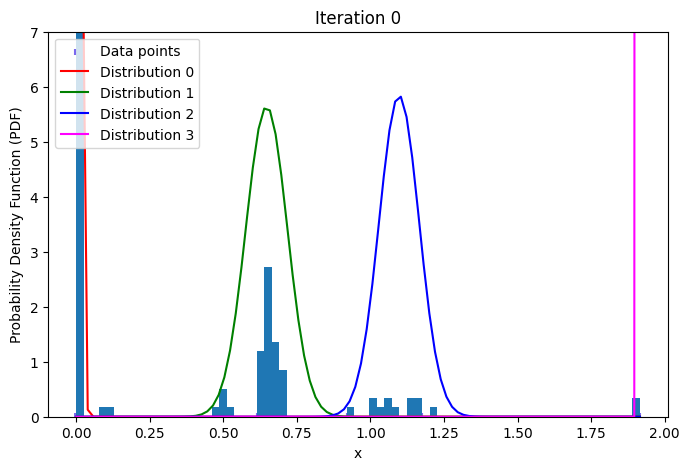

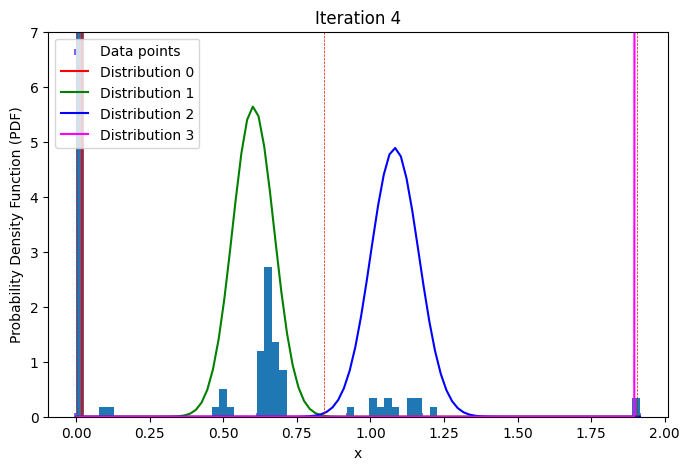

In [8]:
new_em_KIR2DS3=EM(KIR2DS3_data)
t_KIR2DS3=gauss.findThreshold2(KIR2DS3_data,new_em_KIR2DS3)
gauss.PlotGMM(KIR2DS3_data,new_em_KIR2DS3,10,t_KIR2DS3,7)

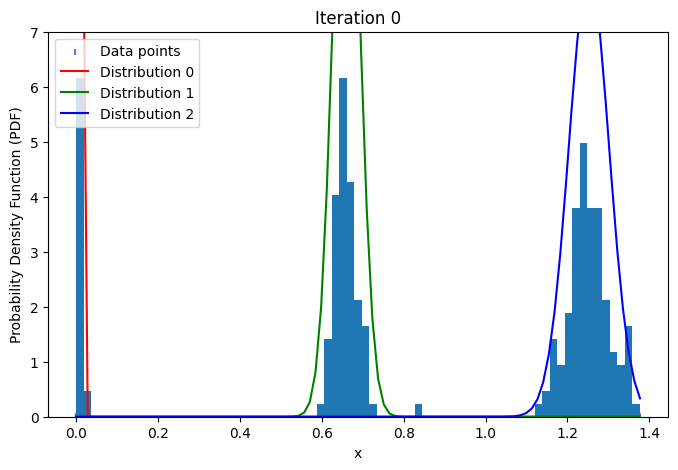

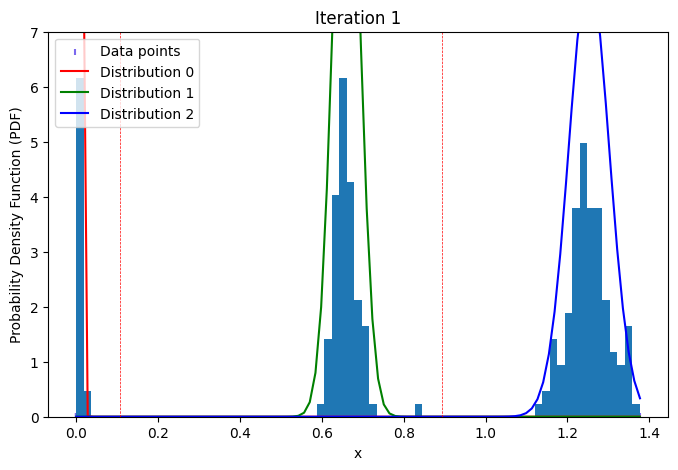

In [14]:
new_em_KIR2DL3=EM(KIR2DL3_data)
t_KIR2DL3=gauss.findThreshold2(KIR2DL3_data,new_em_KIR2DL3)
gauss.PlotGMM(KIR2DL3_data,new_em_KIR2DL3,10,t_KIR2DL3,7)